D:\Anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


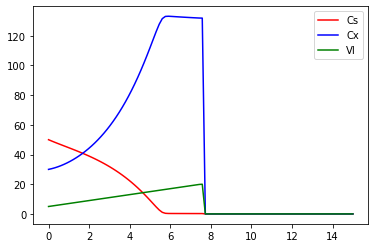

               cs             cx             Vl
0    5.000000e+01   3.000000e+01   5.000000e+00
1    4.912783e+01   3.046615e+01   5.303030e+00
2    4.828667e+01   3.104009e+01   5.606061e+00
3    4.746717e+01   3.171670e+01   5.909091e+00
4    4.666147e+01   3.249266e+01   6.212121e+00
5    4.586286e+01   3.336612e+01   6.515152e+00
6    4.506545e+01   3.433639e+01   6.818182e+00
7    4.426401e+01   3.540380e+01   7.121212e+00
8    4.345382e+01   3.656952e+01   7.424242e+00
9    4.263051e+01   3.783548e+01   7.727273e+00
10   4.179000e+01   3.920426e+01   8.030303e+00
11   4.092838e+01   4.067905e+01   8.333333e+00
12   4.004192e+01   4.226362e+01   8.636364e+00
13   3.912696e+01   4.396225e+01   8.939394e+00
14   3.817990e+01   4.577976e+01   9.242424e+00
15   3.719714e+01   4.772144e+01   9.545455e+00
16   3.617508e+01   4.979306e+01   9.848485e+00
17   3.511010e+01   5.200087e+01   1.015152e+01
18   3.399851e+01   5.435156e+01   1.045455e+01
19   3.283655e+01   5.685229e+01   1.075

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd


# Enter qsmax in g/g*h
# Enter Ks in g/l
# Enter µmax in 1/h
# Enter entrance substrate concentration
# enter inlet flow in l/h
# enter the end vloume of the reactor

qsmax = 0.2
Ks = 1
µmax = 0.5
csf = 50
Fin = 2
Vend = 20




def model (y,t):
    
    cs = y[0]
    
    cx = y[1]
    
    Vl = y[2]
    
    qs = qsmax* cs/(cs + Ks)

    µ = µmax*cs/(cs + Ks)
    
    if Vl < Vend:
        dVldt = Fin  
        
    else:
        dVldt = 0
        
    
    dcsdt = dVldt/Vl * (csf - cs) - qs*cx
    
    dcxdt = cx*(µ - dVldt/Vl)
    
   
        
        
        
    return (dcsdt, dcxdt, dVldt)


t = np.linspace(0, 15, 100)

y0 = [50, 30, 5]



result = odeint(model, y0, t)

cs = result[:, 0]
cx = result[:, 1]
Vl = result[:, 2]


    

plt.plot(t, cs, "r-")
plt.plot(t, cx, "b-")
plt.plot(t, Vl, "g-")
plt.legend(["Cs", "Cx", "Vl"])
plt.show()


pd.set_option('display.max_rows', 200)
print(pd.DataFrame(result, columns= ("cs", "cx", "Vl")))


    
    
    
    